In [132]:
using DelimitedFiles
using Plots
A = readdlm("/home/minhhn/Documents/ML/Dataset/Breast_Cancer/wdbc.txt", ',')

569×32 Matrix{Float64}:
 842302.0        0.0  17.99  10.38  …  0.7119  0.2654  0.4601  0.1189
 842517.0        0.0  20.57  17.77     0.2416  0.186   0.275   0.08902
      8.43009e7  0.0  19.69  21.25     0.4504  0.243   0.3613  0.08758
      8.43483e7  0.0  11.42  20.38     0.6869  0.2575  0.6638  0.173
      8.43584e7  0.0  20.29  14.34     0.4     0.1625  0.2364  0.07678
 843786.0        0.0  12.45  15.7   …  0.5355  0.1741  0.3985  0.1244
 844359.0        0.0  18.25  19.98     0.3784  0.1932  0.3063  0.08368
      8.44582e7  0.0  13.71  20.83     0.2678  0.1556  0.3196  0.1151
 844981.0        0.0  13.0   21.82     0.539   0.206   0.4378  0.1072
      8.4501e7   0.0  12.46  24.04     1.105   0.221   0.4366  0.2075
      ⋮                             ⋱                  ⋮       
 925292.0        1.0  14.05  27.15  …  0.1326  0.1048  0.225   0.08321
 925311.0        1.0  11.2   29.37     0.0     0.0     0.1566  0.05905
 925622.0        0.0  15.22  30.62     1.17    0.2356  0.4089  0.14

In [133]:
function readData(path, numFeatures=10)
    A = readdlm(path, ',')
    y = A[:, 2]
    X = [ones(length(y)) A[:, 3:2+numFeatures]]
    return X, y
end

readData (generic function with 2 methods)

In [134]:
path = "/home/minhhn/Documents/ML/Dataset/Breast_Cancer/wdbc.txt"
X, y = readData(path, 30)


([1.0 17.99 … 0.4601 0.1189; 1.0 20.57 … 0.275 0.08902; … ; 1.0 20.6 … 0.4087 0.124; 1.0 7.76 … 0.2871 0.07039], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [135]:
function train(X, y)
    return inv(X'*X)*X'*y
end
θ = train(X, y)

31-element Vector{Float64}:
  3.021811738438359
  0.21777205558933854
 -0.004545468674187675
 -0.023739860967873283
 -0.00031783475019127316
 -0.0846891370611047
  4.222035251575221
 -1.3979972832716925
 -2.141833027012126
 -0.10270920015720719
  ⋮
 -0.007159375199047413
  0.002435050570138597
  0.0010112233180002983
 -0.542856861312913
 -0.06715829411587038
 -0.3811912148240566
 -0.464309895390258
 -0.5567875460083087
 -4.303483092149236

In [136]:
X[1,:]'*θ

-0.045574824539169

In [137]:
function classify(X, θ, ϵ=0.5)
    z = X*θ
    z .>= ϵ
end

classify (generic function with 2 methods)

In [138]:
function evaluate(X, y, θ, ϵ=0)
    ŷ = classify(X, θ, ϵ)
    c = y .>= ϵ 
    sum(ŷ .== c)/length(y)
end

evaluate (generic function with 2 methods)

In [139]:
accu = evaluate(X, y, θ, 0.5)

0.9648506151142355

In [140]:
ϵs = 0.4:0.005:0.7

0.4:0.005:0.7

In [141]:
accs = [evaluate(X, y, θ, ϵ) for ϵ ∈ ϵs]

61-element Vector{Float64}:
 0.9332161687170475
 0.9384885764499121
 0.9384885764499121
 0.9420035149384886
 0.9420035149384886
 0.9437609841827768
 0.9437609841827768
 0.9490333919156415
 0.9507908611599297
 0.9560632688927944
 ⋮
 0.9578207381370826
 0.9543057996485061
 0.9543057996485061
 0.9543057996485061
 0.9543057996485061
 0.9507908611599297
 0.9420035149384886
 0.9367311072056239
 0.9349736379613357

In [142]:
map(ϵ -> evaluate(X, y, θ, ϵ), ϵs)

61-element Vector{Float64}:
 0.9332161687170475
 0.9384885764499121
 0.9384885764499121
 0.9420035149384886
 0.9420035149384886
 0.9437609841827768
 0.9437609841827768
 0.9490333919156415
 0.9507908611599297
 0.9560632688927944
 ⋮
 0.9578207381370826
 0.9543057996485061
 0.9543057996485061
 0.9543057996485061
 0.9543057996485061
 0.9507908611599297
 0.9420035149384886
 0.9367311072056239
 0.9349736379613357

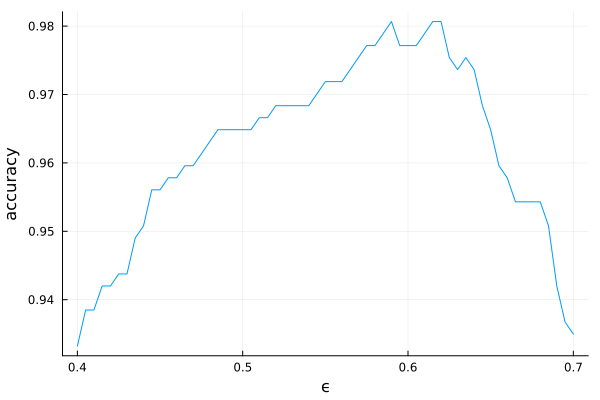

In [143]:
plot(ϵs, accs, xlabel="ϵ", ylabel="accuracy", legend=false)